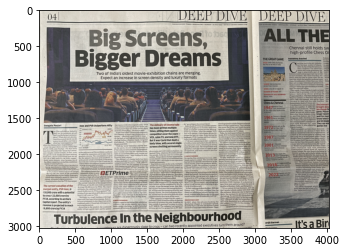

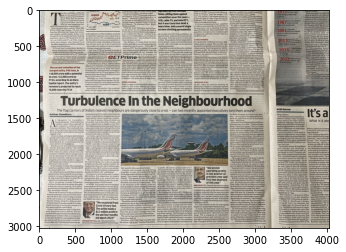

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../Resources/Photos/newspaper-1.JPG')
rgbimg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

train_img = cv2.imread('../Resources/Photos/newspaper-3.JPG')
train_rgbimg = cv2.cvtColor(train_img,cv2.COLOR_BGR2RGB)


plt.imshow(rgbimg)
plt.show()


plt.imshow(train_rgbimg)
plt.show()


orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(rgbimg,None)
kp2, des2 = orb.detectAndCompute(train_rgbimg,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
# img3 = cv2.drawMatches(rgbimg,kp1,train_rgbimg,kp2,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# plt.figure(figsize = (100,100))
# plt.imshow(img3)
# plt.show()



stitching ain't successful


TypeError: Image data of dtype object cannot be converted to float

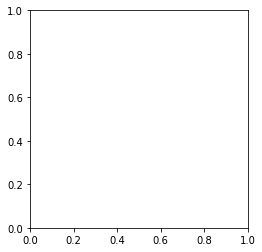

In [15]:
imgs = []
imgs.append(rgbimg)
imgs.append(train_rgbimg)

for i in range(len(imgs)):
    imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)
    # this is optional if your input images isn't too l

stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(imgs)
 
if dummy != cv2.STITCHER_OK:
  # checking if the stitching procedure is successful
  # .stitch() function returns a true value if stitching is
  # done successfully
    print("stitching ain't successful")
else:
    print('Your Panorama is ready!!!')

# plt.figure(figsize = (100,100))
plt.imshow(output)
plt.show()


[[ 1.66856140e+01 -1.47516018e+01  1.61713739e+03]
 [ 2.64640087e+01 -2.33595386e+01 -6.68992843e+02]
 [ 9.51547496e-03 -8.76511680e-03  1.00000000e+00]]


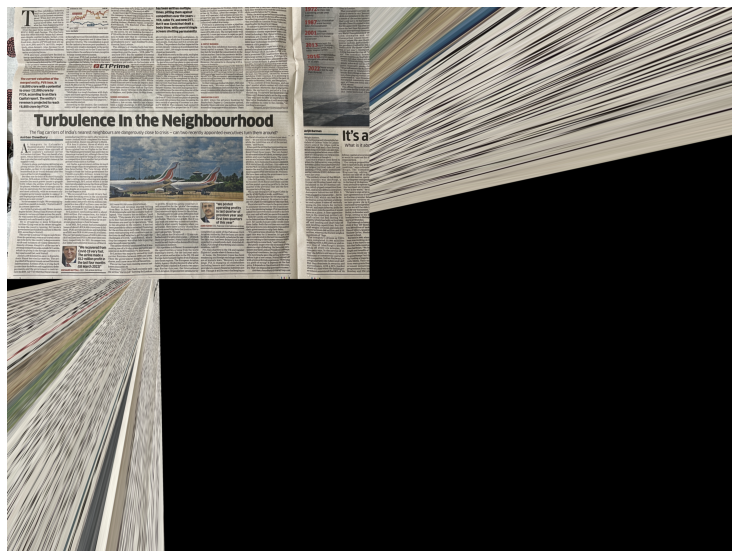

In [10]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None


M = getHomography(kp1, kp2, des1, des2, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)
width = train_rgbimg.shape[1] + rgbimg.shape[1]
height = train_rgbimg.shape[0] + rgbimg.shape[0]

result = cv2.warpPerspective(train_rgbimg, H, (width, height))
result[0:rgbimg.shape[0], 0:rgbimg.shape[1]] = rgbimg

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

